# Fourier Transforms and Quantum Mechanics

### Fourier Series

The Fourier series enables us to represent _periodic_ functions as infinite sums. Particularly, it represents functions as a sum of weighted $\sin$ and $\cos$ functions.

This is possible, since the $\sin$ and $\cos$ functions form a complete orthogonal set (**basis functions**). The Fourier series for a function $f(x)$ with a period of $2{\pi}$ is given by:

:::{admonition} **Fourier Series**
:class: important

$$f(x) = \frac{a_0}{2} + \sum \limits _{n=1} ^{\infty}a_n \cos(nx) + \sum \limits _{n=1} ^{\infty}b_n \sin(nx)$$

$$a_n = \frac{1}{\pi} \int_{-{\pi}}^{\pi} f(x)\cos(nx)dx \,\,\,\,n=1, 2, ...$$

$$b_n = \frac{1}{\pi} \int_{-{\pi}}^{\pi} f(x)\sin(nx)dx \,\,\,\,n=1, 2, ...$$

:::

:::{admonition} **Fourier coeffiecients and orthogonality of sin and cos functions**
:class: info, dropdown

- Using the orthogonality property of the cos and sin functions we can determine an expression for the coefficients of the Fourier Series. By integrating the Fourier Series over the interval [-${\pi}$,${\pi}$], we can determine an expression for $a_0$. Over this interval, the sums will vanish, as we are intergrating the $\sin$ and $\cos$ functions over one period. Thus, we are left with

$$\int_{-{\pi}}^{\pi} f(x)dx = \int_{-{\pi}}^{\pi}\frac{a_0}{2}dx.$$

- Therefore, by carrying out the integral we find the expression for $a_0$ to be

$$a_0 = \frac{1}{\pi} \int_{-{\pi}}^{\pi} f(x)dx.$$

- From this, it is clear that the $\frac{a_0}{2}$ term in the series represents the mean of the function $f(x)$ over the period. In order to determine the $a_n$ coefficients we must multiply the series by $\cos(mx)$, for a positive integer $m$, and integrate over its period. The series becomes

$$\int_{-{\pi}}^{\pi}f(x)\cos(mx)dx = \frac{a_0}{2}\int_{-{\pi}}^{\pi}\cos(mx)dx + \sum \limits _{n=1} ^{\infty}\int_{-{\pi}}^{\pi}a_n\cos(nx)\cos(mx)dx + \sum \limits _{n=1} ^{\infty}\int_{-{\pi}}^{\pi}b_n\sin(nx)\cos(mx)dx.$$

- Due to the orthogonality property of the $\sin$ and $\cos$ functions, the only term that does not vanish on the right-hand side is $\int_{-{\pi}}^{\pi}a_n\cos(nx)\cos(mx)dx$ for $m=n$. Solving for $a_n$ we get

$$a_n = \frac{1}{\pi} \int_{-{\pi}}^{\pi} f(x)\cos(nx)dx \,\,\,\,n=1, 2, ...$$

- This is consistent with the expresion for $a_0$ for $n=0$. Thus the 1/2 factor included on the $a_0$ term is there to maintain this consistency between $a_0$ and $a_n$.

- To determine the values of the $b_n$ coefficients we multiply by $\sin(mx)$. Similarly to the $a_n$ coefficients, due to the orthogonality property, the only term that does not vanish on the right-hand side is $\int_{-{\pi}}^{\pi}b_n\sin(nx)\sin(mx)dx$ for $m=n$. Thus, solving for $b_n$

$$b_n = \frac{1}{\pi} \int_{-{\pi}}^{\pi} f(x)\sin(nx)dx \,\,\,\,n=1, 2, ...$$

:::

### Square function and Gibbs phenomenon

Now that we have introduced the Fourier Series lets look at an example, the positive square wave. This is defined as

$$
f(x) = \left\{
    \begin{array}\\
        0 & \mbox{if } \ -{\pi} \leq x < 0 \\
        1 & \mbox{if } \ 0 < x < {\pi},\\
    \end{array}
    \right
$$

Let's plot this function.

In [ ]:
# Define a function to create a square wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def square(x, period):
    
    # Create array with zeros
    y = np.zeros(len(x))
    
    # Change zeros to 1 based on a given period
    # in radians (e.g. 2pi, 3pi)
    for i in range(len(x)):
        if (x[i]/(period)) % 1 < 0.50:
            y[i] = 1.0
    return y

N = 1000 # Number of points
x = np.linspace(-10.0, 10.0, N)

plt.figure(figsize=(7,4))
plt.plot(x, square(x, 2*np.pi))
plt.grid(True)
plt.ylim(-0.2, 1.2)
plt.xlabel('x')
plt.show()

Now let's try to express the square wave as a Fourier Series. Firstly we need to calculate the coefficients using the above expressions. Carrying out the calculations we find

$$a_0 = \frac{1}{\pi} \int_{0}^{\pi} dx = 1,\\
a_n = \frac{1}{\pi} \int_{0}^{\pi} \cos(nx)dx = 0, \,\,\,\,n\geq 1,$$
$$
 b_n = \frac{1}{\pi} \int_{0}^{\pi} \sin(nx)dx = \left\{
    \begin{array}
        \frac{2}{n{\pi}} & \mbox{if n is odd,} \\
        0 & \mbox{if n is even}.\\
    \end{array}
\right.
$$

Now let's plot the Fourier Series for $ n=10, n=50,$ and $n=100$.

In [ ]:
# Define the cos and sin terms of the Fourier series
def cosTerm(n):
    # Always zero except for n=0
    if n==0: return 1.0
    return 0.

def sinTerm(n):

    if n%2: # n modulo 2 = 1 (True) then Odd
        ret = 2. / (n* np.pi)
    else:
        ret = 0.
    return ret

def fourier(n,x):
    #a_0 term, remember 1/2
    sum = cosTerm(0)/2.0 * np.ones(len(x))
    
    #all other terms
    for i in range(1, n+1):
        sum += sinTerm(i)*np.sin(i*x) + cosTerm(i)*np.cos(i*x)
    return sum

fig, axes = plt.subplots(1, 3, figsize=(14,4), sharey=True)

# Loop over each subplot
for idx, i in enumerate([10, 50, 100]):
    ax = axes[idx]
    ax.plot(x, fourier(i, x), label="n = %g" % (i))
    ax.plot(x, square(x, 2*np.pi), color="black", label="square wave")
    ax.legend(loc="upper right", fontsize="small")
    ax.set_xlabel("x")
    ax.set_ylim(-0.2, 1.2)
    
plt.tight_layout()
plt.show()

### Fourier Transform

We can remember that the Euler transform converts $e^{ix}$ into sine and cosines, so we can also write the Fourier series in complex numbers:

$$
f(x)=\sum_{n=0}^{\infty} c_{n} \exp \left(i \frac{2 \pi n x}{L}\right)
$$

And the coefficients would then be:

$$
c_{n}=\frac{1}{L} \int_{-\frac{L}{2}}^{\frac{L}{2}} f(x) \exp \left(-i \frac{2 \pi n x}{L}\right) d x
$$

We might not like the use of complex numbers, but it's obviously the same Fourier series. We can also simplify the notation a bit, by introducing the "wave number"

$$
k_{n}=\frac{2 \pi n}{L} = \frac{2 \pi}{\lambda}
$$

where $\lambda$ is the wavelength. If we let the length $L$ go to infinity, then:

$$
\Delta k_{n}=\frac{2 \pi n}{L} \rightarrow d k
$$

the coefficients are:

$$
c(k)=\frac{1}{2 \pi} \int_{-\infty}^{\infty} f(x) \mathrm{e}^{-i k x} d x
$$

:::{admonition} **Fourier transform**:
:class: important

$$
F(k)=\int_{-\infty}^{\infty} f(x) \mathrm{e}^{-i k x} d x
$$

The original $f(x)$ is the **inverse Fourier transform**:

$$
f(x)=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(k) \mathrm{e}^{i k x} d k
$$
    
:::

### Fourier analysis of time-series data

#### Periodic data

We're going to construct an array of time points. Then we'll set up a function with two sine waves:

$$
y = \sin(30 \cdot 2\pi t) + \frac{1}{2} \sin(50 \cdot 2 \pi t)
$$

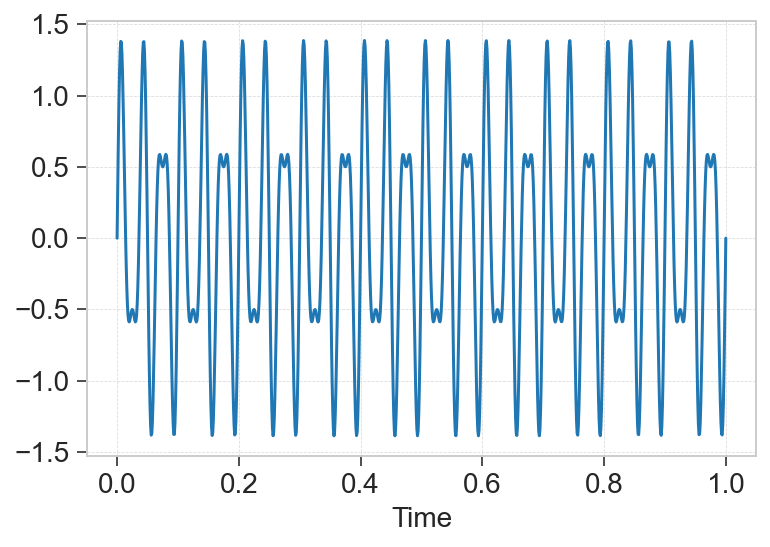

In [2]:
# Number of sample points
N = 1000
# sample spacing
delta = 1.0 / 1000.0

t = np.linspace(0.0, delta*N, N)
y = np.sin(30.0 * 2.0*np.pi*t) + 0.5*np.sin(50.0 * 2.0*np.pi*t)

plt.plot(t, y)

plt.xlabel("Time")
plt.show()

- Seems suitably complicated. We can use `scipy.fftpack` to perform the "fast Fourier transform" (FFT). The resulting "x" variable will be in frequency - so the limit is defined by the $dt$ we had. We cannot find a higher frequency than that time resolution. (In short, if we expected to have GHz signals, we'd need short time resolution.)

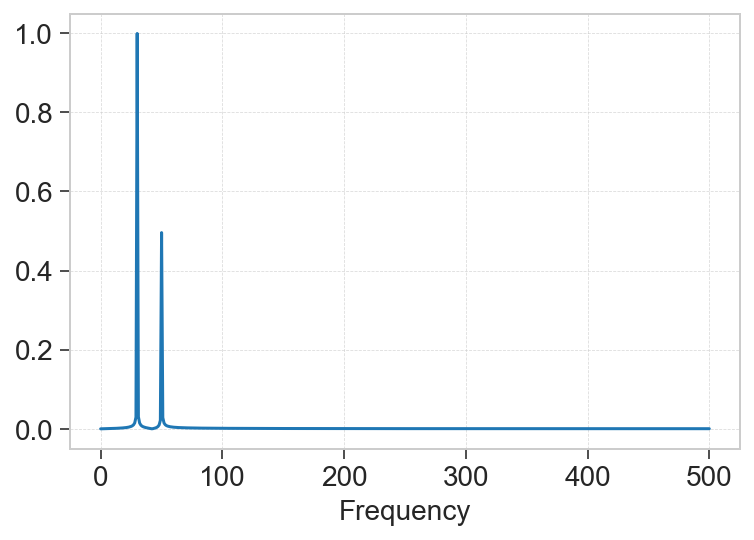

In [3]:
import scipy.fftpack

xf = np.linspace(0.0, 1.0/(2.0*delta), (N//2))
yf = scipy.fftpack.fft(y)

plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlabel("Frequency")
plt.show()

- Notice it's not a *perfect* reconstruction. We only put in two specific frequencies, so we'd expect to see two different lines. But if we don't have exactly perfect waves when we cut off the time signal, there will be a bit of peak width.

- The time-domain signal can be as complicated as we want. Here's an example with 4 frequencies - note that it doesn't matter the *phase* indicated by sine or cosine functions - they're both periodic.

#### Noisy periodic data

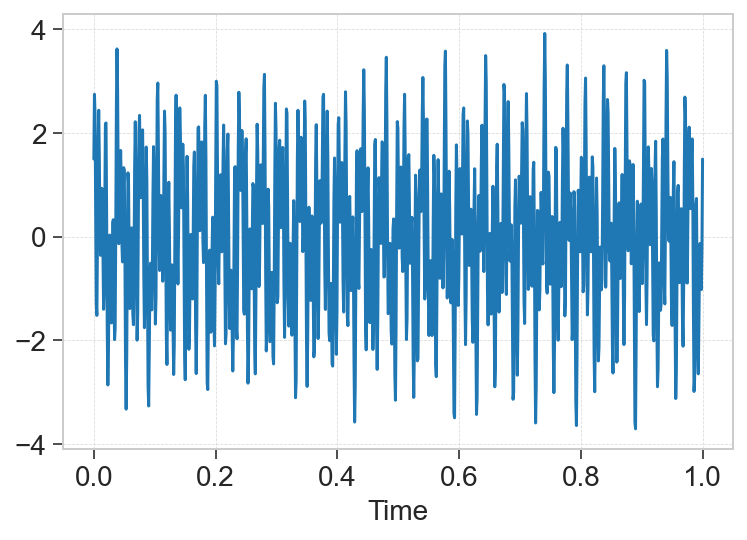

In [4]:
y = np.sin(30.0 *2.0*np.pi*t) + 0.5*np.cos(50.0 *2.0*np.pi*t)
y = y + 1.5*np.sin(165.0 *2.0*np.pi*t) + np.cos(104 * 2*np.pi*t)

plt.plot(t, y)

plt.xlabel("Time")
plt.show()

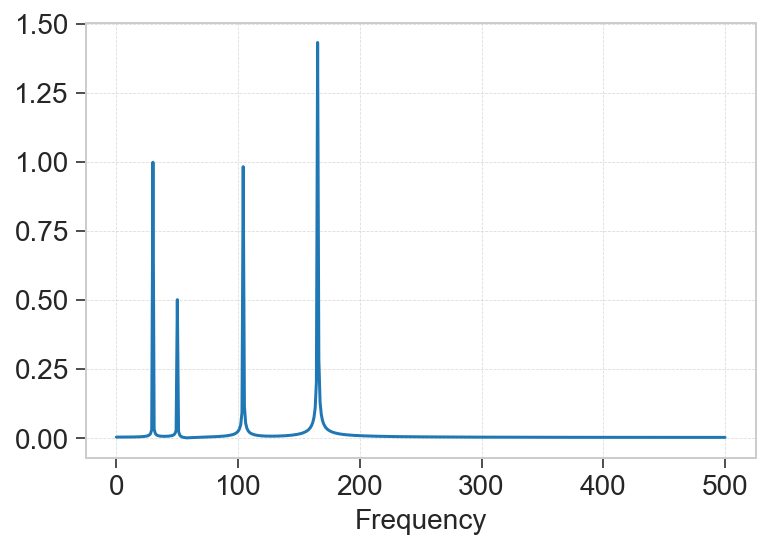

In [5]:
yf = scipy.fftpack.fft(y)

plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlabel("Frequency")
plt.show()

#### Noisy non-periodic data

- Whatever signals we put into our time function will come out from our FFT .. at least given the time resolution we start with. (We can't find 800 Hz frequencies in this example).

- Also, the time signal doesn't need to be completely periodic.. a "chirp" can also work where the signal intensity drops over time.

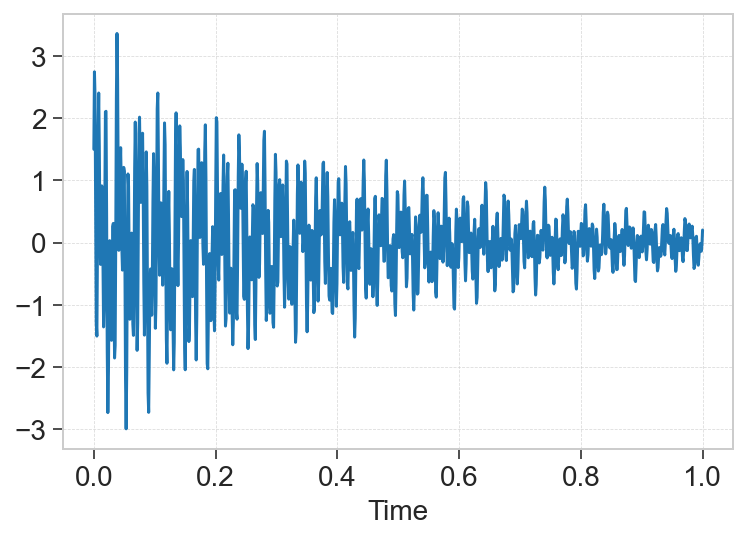

In [6]:
y = y * np.exp(-2*t)

plt.plot(t, y)

plt.xlabel("Time")
plt.show()

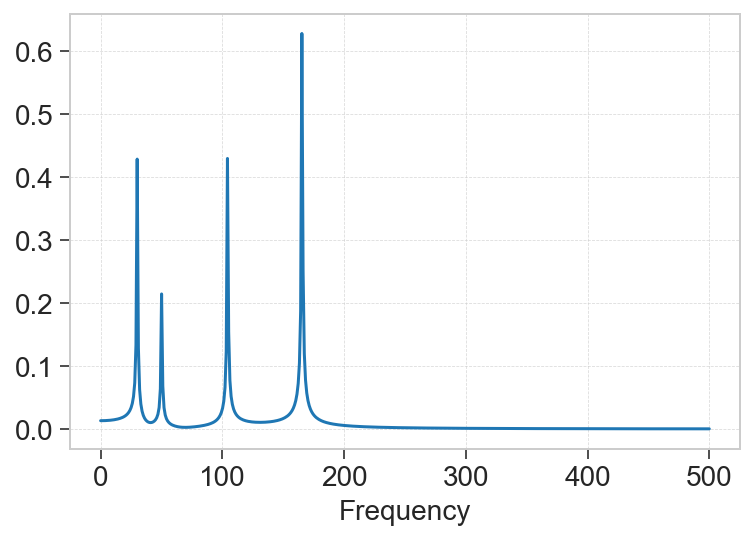

In [7]:
yf = scipy.fftpack.fft(y)

plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlabel("Frequency")
plt.show()

- Notice that while the peak heights changed a bit, the relative intensities and peak areas remain unchanged. So if you're doing spectroscopy, you'll need a few wave repeats, but it doesn't need to be a "continuous wave" spectra - useful if you're worried about applying a high-intensity beam (e.g. x-ray, etc.)

### Fourier transoform and the uncertainty relation

**Define the Square Function to represent $\psi(x)$**: Start with a square function (or rectangular pulse) that has a width $w$ and height 1, centered around zero. This function can be represented as:

$$
   \psi(x) = \begin{cases} 
   1, & |x| \leq \frac{w}{2} \\
   0, & |x| > \frac{w}{2}
   \end{cases}
$$
   
**Fourier Transform gives us $\psi(p)$**: The Fourier transform $\hat{f}(k)$ of a square function is a sinc function:

   $$
   \hat{\psi}(k) = w \, \text{sinc}(kw/2)
   $$

- where $\text{sinc}(x) = \frac{\sin(x)}{x}$. This shows how the Fourier transform spreads out as the width of the square function changes.

:::{admonition} **Uncertainty Relation**
:class: important   

   $$
   \Delta x \Delta k \geq \frac{1}{2}
   $$
   
:::

- The uncertainty principle states that the product of the **standard deviations** of a **function and its Fourier transform** is **bounded by a minimum value**!
- Here, $\Delta x$ is the width of the function (related to the spread in position), and $ \Delta k$ is the spread of the Fourier transform (momentum space). As the width $w$ of the square function decreases, the sinc function’s spread in the Fourier domain increases, demonstrating the uncertainty relation.
- In quantum mechanics using De Broglie relation we can recover uncertaintly relation $k=2\pi/\lambda = 2\pi p/h = p/\hbar$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the square function
def square_function(x, w):
    return np.where(np.abs(x) <= w / 2, 1, 0)

# Fourier transform of the square function (sinc function)
def fourier_transform_square_function(k, w):
    return w * np.sinc(k * w / (2 * np.pi))

# Define x and k ranges
x = np.linspace(-5, 5, 1000)
k = np.linspace(-20, 20, 1000)

# Define different widths for the square function
widths = [0.5, 1, 2]

# Plot the square functions and their Fourier transforms
fig, axes = plt.subplots(2, len(widths), figsize=(12, 6))

for i, w in enumerate(widths):
    # Square function in position space
    sq_func = square_function(x, w)
    axes[0, i].plot(x, sq_func)
    axes[0, i].set_title(f'Square function (w = {w})')
    axes[0, i].set_ylim([-0.1, 1.1])
    
    # Fourier transform in momentum space
    ft_sq_func = fourier_transform_square_function(k, w)
    axes[1, i].plot(k, ft_sq_func)
    axes[1, i].set_title(f'Fourier Transform (w = {w})')
    axes[1, i].set_ylim([-0.5, 2.5])

# Display the plots
plt.tight_layout()
plt.show()


### Fourier transforms of Gaussian functions

A Gaussian function is defined as 

$$ f(t) = \exp\left(- \frac{t^2}{2{\sigma^2}}\right), $$

where $\sigma$ is the standard devation of the Gaussian. The Fourier transform of a gaussian is another Gaussian such that

$$ \mathcal{F}[f(t)] = \sqrt{2\pi}\, \exp\left(- \frac{\omega^2\sigma^2}{2}\right) $$

Thus, we can see that as the Gaussian function gets broader, its Fourier Transform gets narrower. To illustrate this, let's plot the Gaussian and its transform for two different standard deviations.

In [ ]:
from scipy import signal

g1 = signal.gaussian(100, std = 10)
t = np.linspace(-10, 10, len(g1))

plt.subplot(1,2,1)
plt.plot(t, g1)
plt.title('Gaussian Function, std = 10')


FT_omega = np.fft.fftfreq(len(g1), t[1] - t[0])
FT = np.fft.fft(g1)
FT_omega = np.fft.fftshift(FT_omega)
FT = np.fft.fftshift(FT)

plt.subplot(1,2,2)
plt.plot(FT_omega, abs((FT)))
plt.title('Fourier Transform')
plt.tight_layout()
plt.show()

g2 = signal.gaussian(100, std = 1)
t = np.linspace(-10,10, len(g2))

plt.subplot(1,2,1)
plt.plot(t, g2)
plt.title('Gaussian Function, std = 1')

FT_omega = np.fft.fftfreq(len(g2), t[1] - t[0])
FT = np.fft.fft(g2)
FT_omega = np.fft.fftshift(FT_omega)
FT = np.fft.fftshift(FT)

plt.subplot(1,2,2)
plt.plot(FT_omega, abs((FT)))
plt.title('Fourier Transform')
plt.tight_layout()
plt.show()

### Delta Function

The delta function, $\delta(t)$, is defined as

$$
\delta(t) = \left\{
    \begin{array}{ll}
        0 & \text{if } t \neq 0, \\
        \infty & \text{if } t = 0.
    \end{array}
\right.
$$


Carrying out the transform we see that Fourier Transform of the delta function is actually a constant, such that

$$ \mathcal{F}[{\delta}(t)] = 1 $$

Let's plot the function and its transform.

In [ ]:
from scipy import signal
imp = signal.unit_impulse(100, 'mid') # creates the delta function
t = np.linspace(-5, 5, 100)

plt.subplot(1,2,1)
plt.plot(t, imp)
plt.title('Delta Function')

FT_omega = np.fft.fftfreq(100, t[1] - t[0])
FT = np.fft.fft(imp)

plt.subplot(1,2,2)
plt.plot(FT_omega, abs(FT))
plt.title('Fourier Transform')
plt.ylim([0,1.2])
plt.tight_layout()
plt.show()